# TSF internship task 2 : IRIS dataset




## loading and Analyzing the dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd


with open("/content/gdrive/MyDrive/TSF tasks/datasets/Iris.csv","r+") as file:
    df = pd.read_csv(file)

df.describe()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [2]:
df["Species"].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Processing the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


As there is no null values. there's no need to drop the datapoint or replace it.

In [5]:
y=df["Species"]
x= df.drop(columns = ["Species" , "Id"])
df=df.drop(columns = ["Id"])
x = df.iloc[:, [0, 1, 2, 3]].values

## Correlation Matrix
In statistics, correlation or dependence is any statistical relationship between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are linearly related.

In a correlation matrix each cell shows the correlation between 2-variables. The value is in the range of -1 to 1 . If two variable have high correlation, we can neglect one variable from those two.


In [6]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


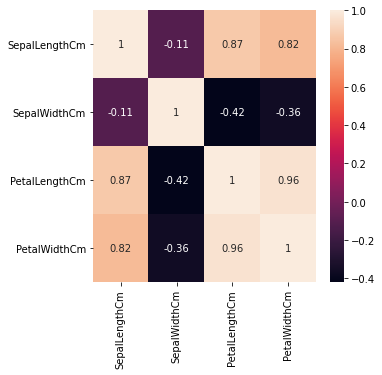

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
fig,ax = plt.subplots(figsize = (5,5))
sns.heatmap(corr, annot = True, ax=ax)

## Predicting the optimum value of clusters

The term clustering validation is used to design the procedure of evaluating the results of a clustering algorithm. There are more than thirty indices and methods for identifying the optimal number of clusters. The following methods are some of them.
1. Gap Statistic
2. Elbow Method
3. Silhouette Coefficient
4. Calinski-Harabasz Index
5. Davies-Bouldin Index

We will use Elbow method, 
the method is based on calculating the Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k) and selecting the k for which change in WSS first starts to diminish.
The idea behind the elbow method is that the explained variation changes rapidly for a small number of clusters and then it slows down leading to an elbow formation in the curve. The elbow point is the number of clusters we can use for our clustering algorithm.

#### Calculating Inertia
 inertia actually calculates the sum of distances of all the points within a cluster from the centroid of that cluster.

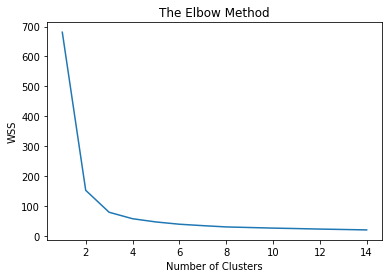

In [8]:
WSS=[]
from sklearn.cluster import KMeans
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    WSS.append(kmeans.inertia_)


plt.plot(range(1,15), WSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

As you can see from above, the elbow point is at the number of clusters = 2 which is the optimum number of clusters required for k-means algorithm.

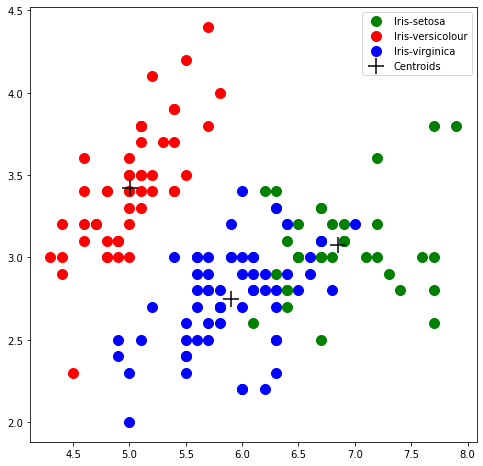

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Plotting 
plt.rcParams["figure.figsize"] = 8,8
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')  
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label ='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'black', marker= "+", label = 'Centroids')

plt.legend()
plt.show()

